In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time 

dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

#### Node Optimisation data

In [2]:
df_node = utils.load_pickle_file_to_df('W10_100ephs_optimisation_of_nodes', dir_name_e)
print(df_node)

       nodes                                           accuracy  \
0     (5, 6)  [0.30281689763069153, 0.35211268067359924, 0.4...   
1     (5, 8)  [0.2535211145877838, 0.43661972880363464, 0.33...   
2    (5, 10)  [0.4084506928920746, 0.4084506928920746, 0.408...   
3    (5, 12)  [0.2112676054239273, 0.30985915660858154, 0.35...   
4    (10, 6)  [0.2957746386528015, 0.3309859037399292, 0.373...   
5    (10, 8)  [0.17605634033679962, 0.3802816867828369, 0.43...   
6   (10, 10)  [0.30281689763069153, 0.39436620473861694, 0.4...   
7   (10, 12)  [0.3661971688270569, 0.3732394278049469, 0.422...   
8    (15, 6)  [0.18309858441352844, 0.2957746386528015, 0.40...   
9    (15, 8)  [0.26056337356567383, 0.3380281627178192, 0.39...   
10  (15, 10)  [0.3239436745643616, 0.42957746982574463, 0.51...   
11  (15, 12)  [0.2887323796749115, 0.31690141558647156, 0.52...   
12   (20, 6)  [0.23239436745643616, 0.2887323796749115, 0.33...   
13   (20, 8)  [0.2887323796749115, 0.40140846371650696, 0.42..

#### Layer 1 Node Optimisation data

In [29]:
df_layer1_node = utils.load_pickle_file_to_df('W10_100ephs_optimisation_of_nodes_layer1', dir_name_e)
print(df_layer1_node)

   nodes  accuracy       std      time      loss
0      8  0.516901  0.161364  3.484681  1.267363
1     10  0.653169  0.197282  2.135972  0.994270
2     12  0.613732  0.177979  1.851364  1.062364
3     14  0.560211  0.124201  2.173811  1.093247
4     16  0.422535  0.166412  1.924869  1.137997


### Best optimiser

In [9]:
df_opt = utils.load_pickle_file_to_df('W10_100ephs_best_optimiser', dir_name_e)
print(df_opt)

  optimiser                                           accuracy  \
0      Adam  [0.1690140813589096, 0.27464789152145386, 0.29...   
1  Adadelta  [0.246478870511055, 0.246478870511055, 0.24647...   
2   rmsprop  [0.246478870511055, 0.38732394576072693, 0.345...   
3   Adagrad  [0.23239436745643616, 0.26056337356567383, 0.2...   
4       SGD  [0.2535211145877838, 0.4225352108478546, 0.422...   

                                                loss  \
0  [1.895531415939331, 1.6044937372207642, 1.5085...   
1  [3.954193115234375, 3.9417130947113037, 3.9292...   
2  [2.2755796909332275, 1.5305628776550293, 1.536...   
3  [1.6438394784927368, 1.5342820882797241, 1.516...   
4  [3.4255144596099854, 1.6014060974121094, 1.590...   

                                            val_loss  
0  [1.5742383003234863, 1.5897116661071777, 1.577...  
1  [2.9264657497406006, 2.9157702922821045, 2.905...  
2  [1.5641685724258423, 1.5597431659698486, 1.646...  
3  [1.5798910856246948, 1.5789753198623657, 1.

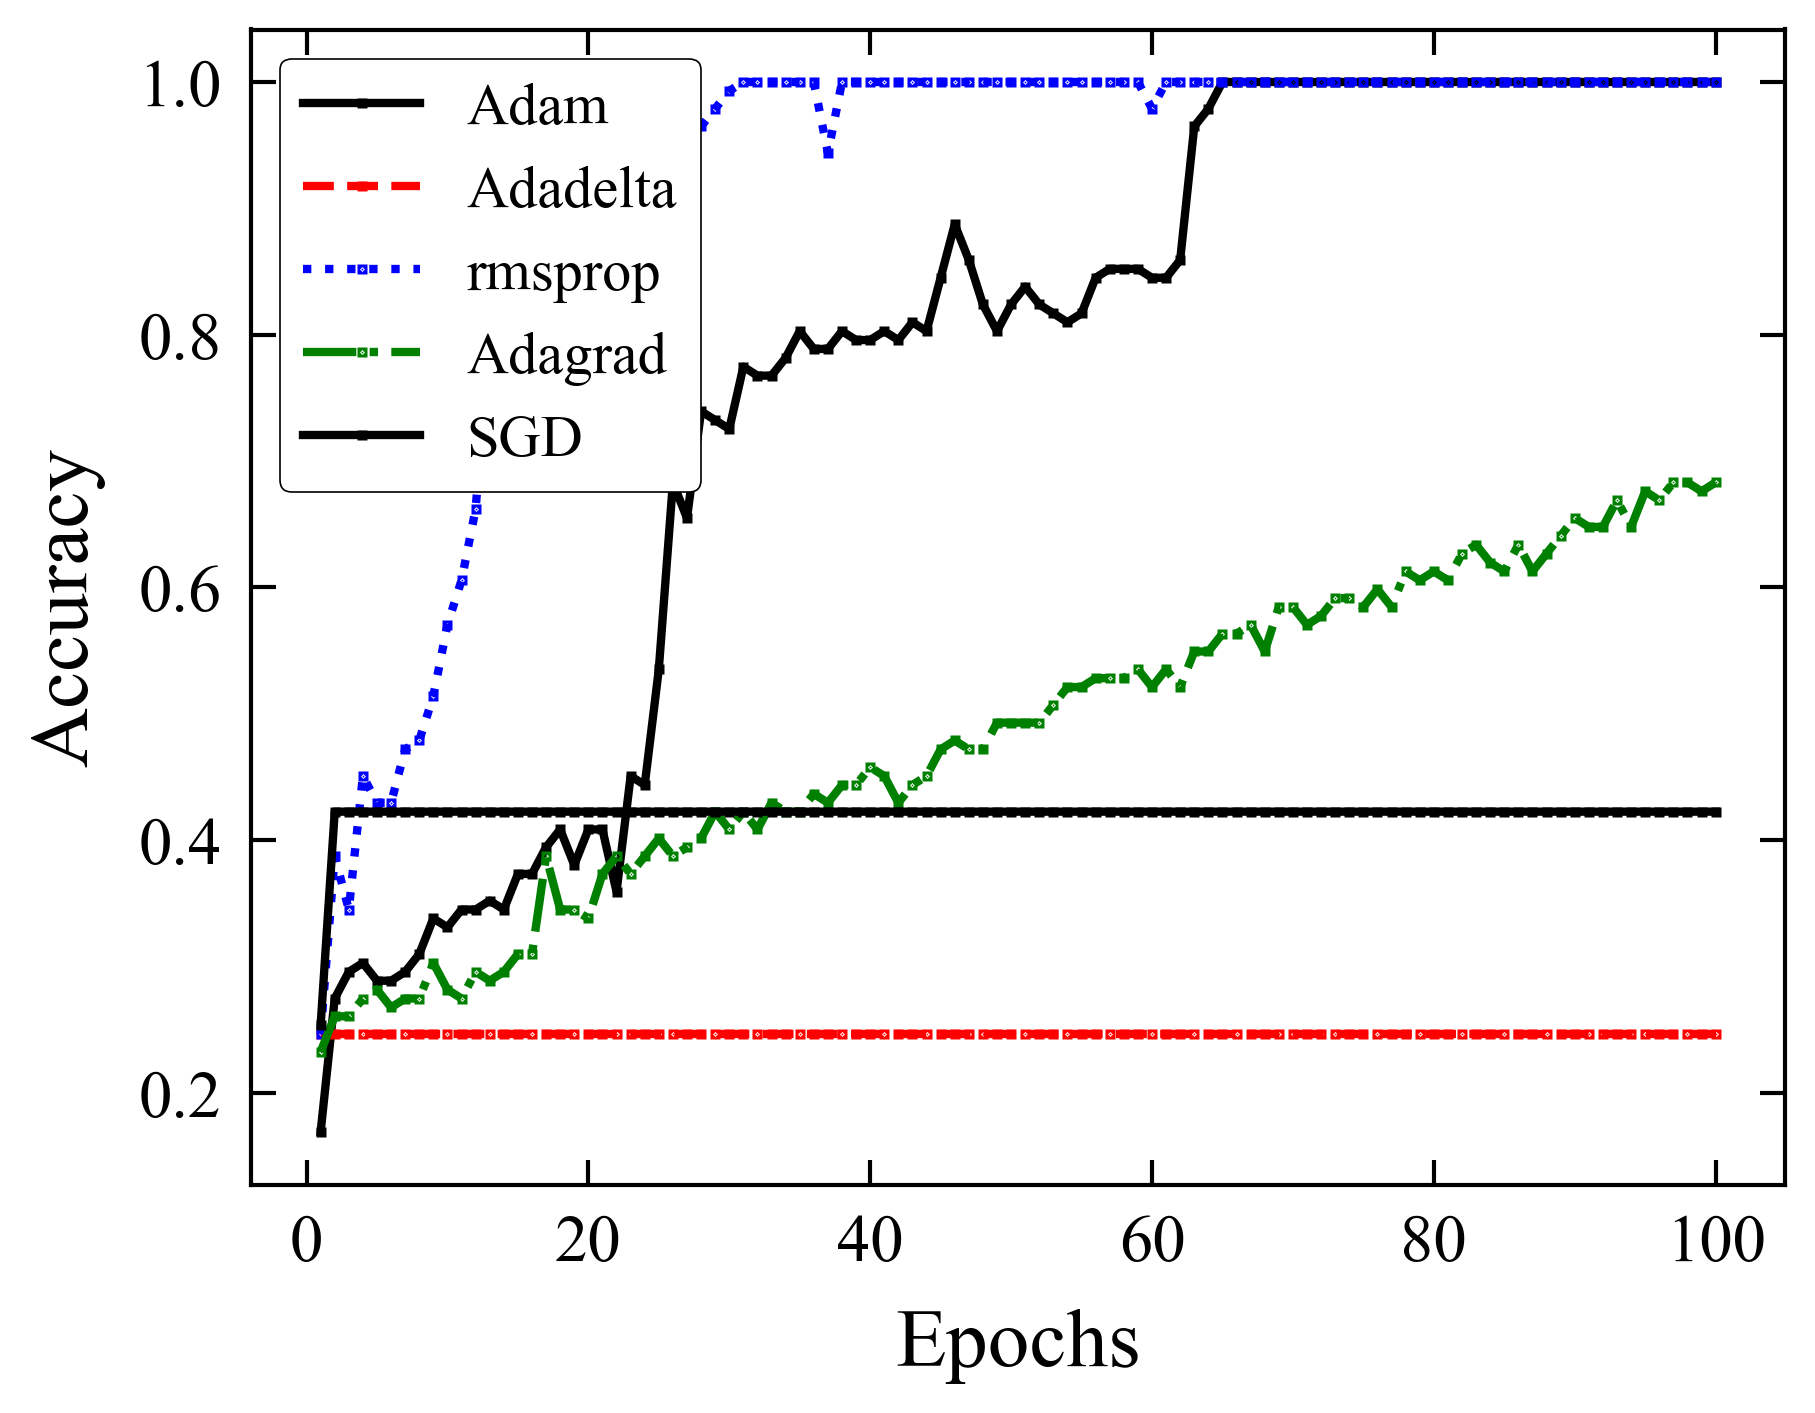

In [13]:
x = np.linspace(1,100,100)
ms = 0.2
plt.plot(x,df_opt['accuracy'][0]  , marker = 's', label = df_opt['optimiser'][0], markersize = ms)
plt.plot(x,df_opt['accuracy'][1]  ,  marker = 's', label = df_opt['optimiser'][1], markersize = ms)
plt.plot(x,df_opt['accuracy'][2]  , marker = 's', label = df_opt['optimiser'][2], markersize = ms)
plt.plot(x,df_opt['accuracy'][3]  , marker = 's', label = df_opt['optimiser'][3], markersize = ms)
plt.plot(x,df_opt['accuracy'][4]  , marker = 's', label = df_opt['optimiser'][4], markersize = ms)


plt.xlabel('Epochs', fontsize=10) # , fontweight = 'bold'
plt.ylabel('Accuracy', fontsize=10) # fontweight = 'bold'
#axes[0].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
#plt.yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
plt.minorticks_off()
#plt.set_title('(c)')
legend = plt.legend(  framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
legend.get_frame().set_linewidth(0.2)

#### Best Batchsize

In [14]:
df_unpickle_big_batch= utils.load_pickle_file_to_df('W10_optimisation_100epochs_batchsize_big_10_to_40', dir_name_e)
df_unpickle_small_batch= utils.load_pickle_file_to_df('W10_optimisation_100epochs_batchsize_small_10_to_40', dir_name_e)
print(df_unpickle_big_batch)

   batchsize                                           accuracy  \
0         10  [0.26056337356567383, 0.35211268067359924, 0.4...   
1         20  [0.30281689763069153, 0.38732394576072693, 0.4...   
2         30  [0.06338027864694595, 0.07746478915214539, 0.0...   
3         40  [0.23943662643432617, 0.22535210847854614, 0.1...   

                                                loss  \
0  [1.814913272857666, 1.4751323461532593, 1.3367...   
1  [1.7734030485153198, 1.4878007173538208, 1.385...   
2  [5.10620641708374, 2.5585379600524902, 2.21610...   
3  [1.92562735080719, 1.583361029624939, 1.577224...   

                                            val_loss  
0  [1.7915998697280884, 1.7496304512023926, 1.631...  
1  [1.5426496267318726, 1.6371557712554932, 1.557...  
2  [2.9257233142852783, 2.4015746116638184, 1.829...  
3  [1.641939401626587, 1.6659328937530518, 1.6246...  


#### Best number of model iterations 

In [15]:
unpickled_df_iteration = utils.load_pickle_file_to_df( 'W11_NN_investigation_best iteration_number', dir_name_e)
print(unpickled_df_iteration)

   iteration_no  accuracy       sem      loss  val_loss
0            10  0.372817  0.000004  1.523521  1.523521
1            20  0.932676  0.000153  0.205860  0.205860
2            30  0.913099  0.000145  0.270375  0.270375
3            40  0.921690  0.000175  0.227023  0.227023
4            50  0.892746  0.000180  0.380789  0.380789
5            60  0.870282  0.000194  0.354537  0.354537


#### Best number of epochs 

In [16]:
df_epochs_load= utils.load_pickle_file_to_df('W10_100ephs_best_epoch_number', dir_name_e)

# Final graphs 

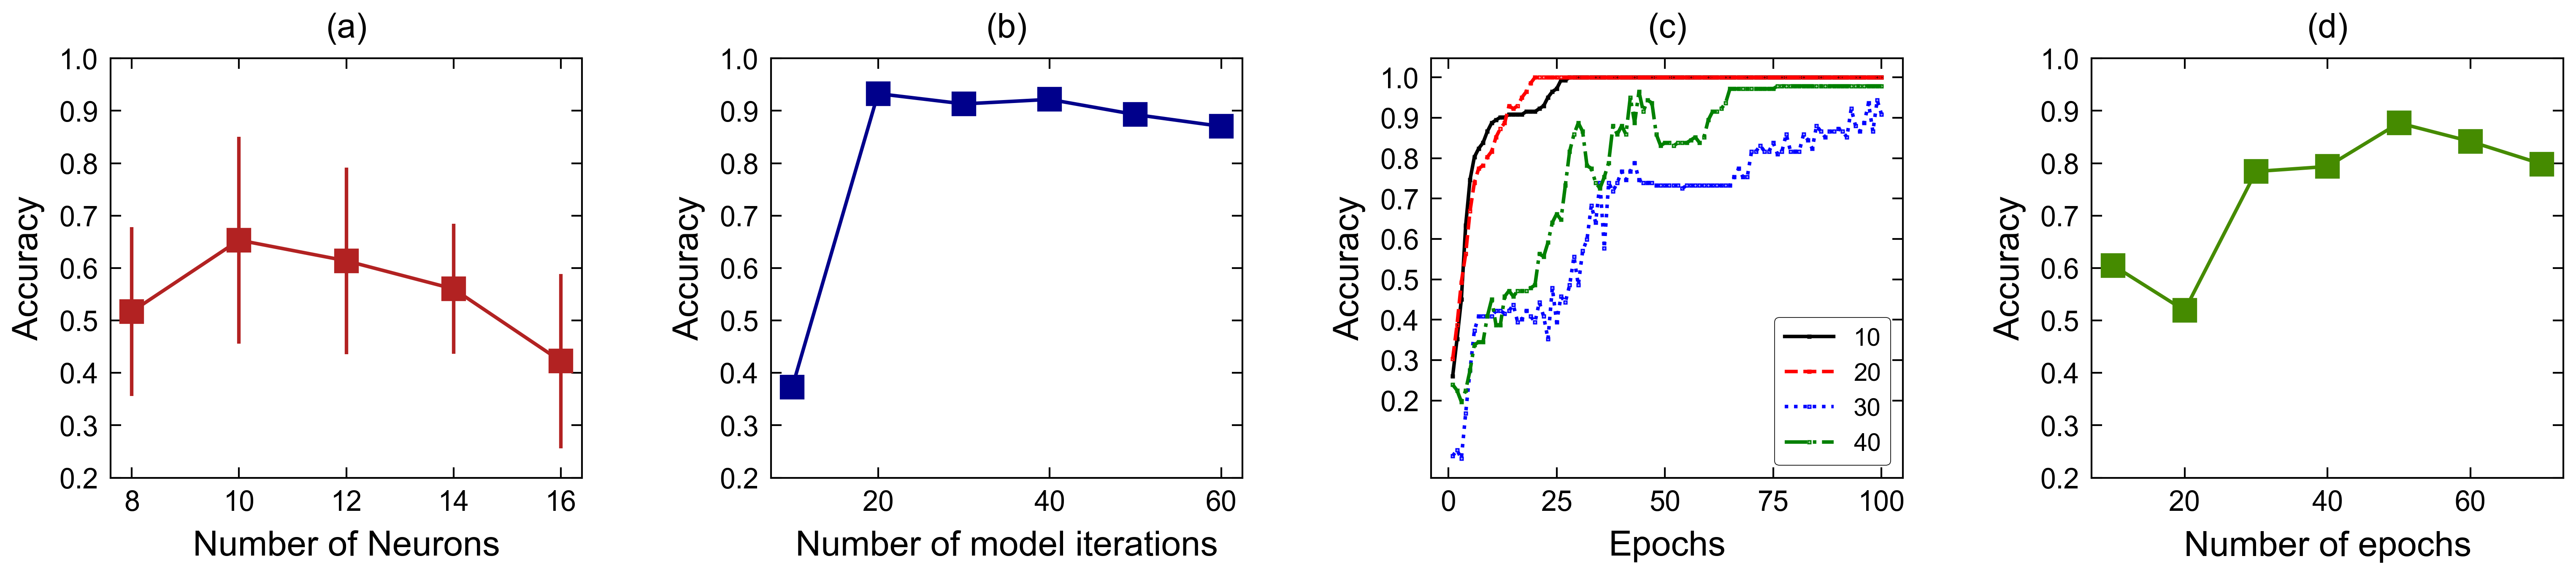

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
from matplotlib import rc, rcParams

blu = '#00008B'
gre = 	'#458B00'
pink = '#008000'


plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams['font.family'] = "Arial"
rc('font', weight='normal')

# Create a figure with three subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (12.5,2.15)) #, figsize=(12, 4)

# Plot the first subplot on the left
# layer 1 node optimisation
axes[0].scatter(df_layer1_node['nodes'],df_layer1_node['accuracy'] , color = '#B22222', marker = 's', s= 10)
axes[0].plot(df_layer1_node['nodes'], df_layer1_node['accuracy'], color = '#B22222', marker = 's')
axes[0].errorbar(df_layer1_node['nodes'],df_layer1_node['accuracy'] , df_layer1_node['std'], color= '#B22222', fmt='none')


axes[0].set_xlabel('Number of Neurons', fontsize=10)
axes[0].set_ylabel('Accuracy', fontsize=10)
# axes[0].xaxis.set_ticks(np.arange(, 1.0, 0.1))
axes[0].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[0].minorticks_off()
axes[0].set_title('(a)')
# legend = axes[0].legend( loc='upper right', framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
# legend.get_frame().set_linewidth(0.2)


# Plot the second subplot in the middle
#best number of model iterations
axes[1].scatter(unpickled_df_iteration['iteration_no'],unpickled_df_iteration['accuracy'] , color = blu, marker = 's', s= 10,)
axes[1].plot(unpickled_df_iteration['iteration_no'],unpickled_df_iteration['accuracy'] , color = blu, marker = 's')
axes[1].errorbar(unpickled_df_iteration['iteration_no'],unpickled_df_iteration['accuracy']  , unpickled_df_iteration['sem'] , color= blu, fmt='none')


axes[1].set_xlabel('Number of model iterations', fontsize=10)
axes[1].set_ylabel('Accuracy', fontsize=10)
# axes[1].xaxis.set_ticks(np.arange(0.3, 1.0, 0.1))
axes[1].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[1].set_title('(b)')
axes[1].minorticks_off()

# legend = axes[1].legend( loc='upper right', framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
# legend.get_frame().set_linewidth(0.2)



# Plot the third subplot on the right#

# Batch size 
x = np.linspace(1,100,100)
ms = 0.2
#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][0] ,  marker = 'x', s= 0.01)
axes[2].plot(x,df_unpickle_big_batch['accuracy'][0]  , marker = 's', label = df_unpickle_big_batch['batchsize'][0], markersize = ms)

#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][1] ,  marker = 'x', s= 0.01)
axes[2].plot(x,df_unpickle_big_batch['accuracy'][1]  ,  marker = 's', label = df_unpickle_big_batch['batchsize'][1], markersize = ms)

#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][2] ,  marker = 'x')
axes[2].plot(x,df_unpickle_big_batch['accuracy'][2]  , marker = 's', label = df_unpickle_big_batch['batchsize'][2], markersize = ms)

#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][3] , marker = 'x')
axes[2].plot(x,df_unpickle_big_batch['accuracy'][3]  , marker = 's', label = df_unpickle_big_batch['batchsize'][3], markersize = ms)



axes[2].set_xlabel('Epochs', fontsize=10) # , fontweight = 'bold'
axes[2].set_ylabel('Accuracy', fontsize=10) # fontweight = 'bold'
#axes[2].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[2].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[2].minorticks_off()
axes[2].set_title('(c)')
legend = axes[2].legend(  framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
legend.get_frame().set_linewidth(0.2)


axes[3].scatter(df_epochs_load['nodes'][:7],df_epochs_load['accuracy'][:7], color = gre, marker = 's', s= 10,)
axes[3].plot(df_epochs_load['nodes'][:7],df_epochs_load['accuracy'] [:7], color = gre, marker = 's')


axes[3].set_xlabel('Number of epochs', fontsize=10)
axes[3].set_ylabel('Accuracy', fontsize=10)
axes[3].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[3].set_title('(d)')
axes[3].minorticks_off()

# optimiser
# axes[3].plot(x,df_opt['accuracy'][0]  , marker = 's', label = df_opt['optimiser'][0], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][1]  ,  marker = 's', label = df_opt['optimiser'][1], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][2]  , marker = 's', label = df_opt['optimiser'][2], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][3]  , marker = 's', label = df_opt['optimiser'][3], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][4]  , marker = 's', label = df_opt['optimiser'][4], markersize = ms)


# axes[3].set_xlabel('Epochs', fontsize=10) # , fontweight = 'bold'
# axes[3].set_ylabel('Accuracy', fontsize=10) # fontweight = 'bold'
# #axes[0].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
# axes[3].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
# axes[3].minorticks_off()
# axes[3].set_title('(d)')
# legend = axes[3].legend(  framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
# legend.get_frame().set_linewidth(0.2)

# Add a shared y-axis label to the leftmost plot
# fig.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')
# Add a shared x-axis label to the bottom plot
# fig.text(0.5, 0.06, 'Time', ha='center', va='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Adjust the spacing between the subplots 
plt.subplots_adjust(wspace=0.4)

filepath = 'final-graphs/plots_optimisation_plots'
plt.savefig(filepath, dpi = 1000)

# Show the plot
plt.show()

In [38]:

blu = '#00008B'
gre = 	'#458B00'
pink = '#008000'


plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams['font.family'] = "Arial"
rc('font', weight='normal')

# Create a figure with three subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (6,2)) #, figsize=(12, 4)

# Plot the first subplot on the left
# layer 1 node optimisation
axes[0].scatter(df_layer1_node['nodes'],df_layer1_node['loss'] , color = '#B22222', marker = 's', s= 10)
axes[0].plot(df_layer1_node['nodes'], df_layer1_node['loss'], color = '#B22222', marker = 's')
#axes[0].errorbar(df_layer1_node['nodes'],df_layer1_node['loss'] , df_layer1_node['std'], color= '#B22222', fmt='none')


axes[0].set_xlabel('Number of Neurons', fontsize=10)
axes[0].set_ylabel('Loss', fontsize=10)
# axes[0].xaxis.set_ticks(np.arange(, 1.0, 0.1))
axes[0].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[0].minorticks_off()
axes[0].set_title('(a)')
# legend = axes[0].legend( loc='upper right', framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
# legend.get_frame().set_linewidth(0.2)


# Plot the second subplot in the middle
#best number of model iterations
axes[1].scatter(unpickled_df_iteration['iteration_no'],unpickled_df_iteration['loss'] , color = blu, marker = 's', s= 10,)
axes[1].plot(unpickled_df_iteration['iteration_no'],unpickled_df_iteration['loss'] , color = blu, marker = 's')
#axes[1].errorbar(unpickled_df_iteration['iteration_no'],unpickled_df_iteration['loss']  , unpickled_df_iteration['sem'] , color= blu, fmt='none')


axes[1].set_xlabel('Number of model iterations', fontsize=10)
axes[1].set_ylabel('Loss', fontsize=10)
# axes[1].xaxis.set_ticks(np.arange(0.3, 1.0, 0.1))
axes[1].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[1].set_title('(b)')
axes[1].minorticks_off()

# legend = axes[1].legend( loc='upper right', framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
# legend.get_frame().set_linewidth(0.2)



# Plot the third subplot on the right#

# Batch size 
x = np.linspace(1,100,100)
ms = 0.2
#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][0] ,  marker = 'x', s= 0.01)
axes[2].plot(x,df_unpickle_big_batch['loss'][0]  , marker = 's', label = df_unpickle_big_batch['loss'][0], markersize = ms)

#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][1] ,  marker = 'x', s= 0.01)
axes[2].plot(x,df_unpickle_big_batch['loss'][1]  ,  marker = 's', label = df_unpickle_big_batch['loss'][1], markersize = ms)

#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][2] ,  marker = 'x')
axes[2].plot(x,df_unpickle_big_batch['loss'][2]  , marker = 's', label = df_unpickle_big_batch['loss'][2], markersize = ms)

#axes[2].scatter(x, df_unpickle_big_batch['accuracy'][3] , marker = 'x')
axes[2].plot(x,df_unpickle_big_batch['loss'][3]  , marker = 's', label = df_unpickle_big_batch['loss'][3], markersize = ms)



axes[2].set_xlabel('Epochs', fontsize=10) # , fontweight = 'bold'
axes[2].set_ylabel('Loss', fontsize=10) # fontweight = 'bold'
#axes[2].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[2].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[2].minorticks_off()
axes[2].set_title('(c)')
legend = axes[2].legend(  framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
legend.get_frame().set_linewidth(0.2)


axes[3].scatter(df_epochs_load['nodes'],df_epochs_load['loss'] , color = gre, marker = 's', s= 10,)
axes[3].plot(df_epochs_load['nodes'],df_epochs_load['loss'] , color = gre, marker = 's')


axes[3].set_xlabel('Number of epochs', fontsize=10)
axes[3].set_ylabel('Loss', fontsize=10)
axes[3].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[3].set_title('(d)')
axes[3].minorticks_off()

# optimiser
# axes[3].plot(x,df_opt['accuracy'][0]  , marker = 's', label = df_opt['optimiser'][0], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][1]  ,  marker = 's', label = df_opt['optimiser'][1], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][2]  , marker = 's', label = df_opt['optimiser'][2], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][3]  , marker = 's', label = df_opt['optimiser'][3], markersize = ms)
# axes[3].plot(x,df_opt['accuracy'][4]  , marker = 's', label = df_opt['optimiser'][4], markersize = ms)


# axes[3].set_xlabel('Epochs', fontsize=10) # , fontweight = 'bold'
# axes[3].set_ylabel('Accuracy', fontsize=10) # fontweight = 'bold'
# #axes[0].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
# axes[3].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
# axes[3].minorticks_off()
# axes[3].set_title('(d)')
# legend = axes[3].legend(  framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
# legend.get_frame().set_linewidth(0.2)

# Add a shared y-axis label to the leftmost plot
# fig.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')
# Add a shared x-axis label to the bottom plot
# fig.text(0.5, 0.06, 'Time', ha='center', va='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Adjust the spacing between the subplots 
plt.subplots_adjust(wspace=0.4)

filepath = 'final-graphs/Viva_plots_optimisation_plots'
#plt.savefig(filepath, dpi = 100)

# Show the plot
plt.show()

ValueError: Image size of 66905x1293 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3600x1200 with 4 Axes>